In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

my_data = pd.read_csv("train.csv")
my_test_data = pd.read_csv("test.csv")

In [2]:
my_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# identify how many null values we have
nullseries = my_data.isnull().sum()
print(nullseries[nullseries > 0])
# We can drop the Alley feature because it has no values for almost all of the samples
    # For Misc feature, PoolQC, and Fence - can we assume that null values means the given sample doesn't have this feature?
    # same with basement, garage, and fireplace
    # Alternatively, we can just put U on the blank features
    # Check value counts to see if there is a "None" value
# We can drop na for Electrical since it's only 1

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [5]:
# According to kaggle, NA = none, so we can replace NA values with 'None'
    # For: Misc, PoolQC, Fence, Basement, Garage, Fireplace, MasVnr | NA = none or 0
# For Electrical: leave it to dropna

cols = ["MiscFeature", "PoolQC", "Fence", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", 
        "BsmtFinType2", "MasVnrType", "MasVnrArea", "Alley",
        "FireplaceQu", "GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond"]
for col in cols:
    my_data[col].fillna("None", inplace=True)
    my_test_data[col].fillna("None", inplace=True)

In [6]:
# See how the null values have improved
nullseries = my_data.isnull().sum()
print(nullseries[nullseries > 0])
# Features with null values left: LotFrontage & Electrical

LotFrontage    259
Electrical       1
dtype: int64


In [7]:
my_data.info()

# All the variables that are not numeric - "Neighborhood", "MSZoning", "Street", "LotShape", 
#  "LandContour", "Utilities", "LotConfig", "LandSlope", "Condition1", 
#  "Condition2", "BldgType", "HouseStyle", "Exterior1st", "RoofMatl",
#  "KitchenQual", "Functional", "FireplaceQu", "GarageType",
#  "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond",
#  "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", 
#  "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical",
#  "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", "PoolQC", 
#  "Fence", "MiscFeature", "SaleType", "SaleCondition"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# Convert all the variables into numeric so all of them can be included in the correlation analysis
# This is just to identify the best variable predictor for LotFrontage
# copied from Aladdin Person

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

my_data_exp = my_data.copy()
# cols = ["Neighborhood", "MSZoning", "Street", "LotShape", 
# "LandContour", "Utilities", "LotConfig", "LandSlope", "Condition1", 
# "Condition2", "BldgType", "HouseStyle", "Exterior1st", "RoofMatl",
# "KitchenQual", "Functional", "FireplaceQu", "GarageType",
# "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond",
# "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", 
# "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical",
# "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", "PoolQC", 
# "Fence", "MiscFeature", "SaleType", "SaleCondition"]

# for col in cols:
    # my_data_exp[col] = le.fit_transform(my_data_exp[col])

<AxesSubplot:xlabel='BldgType', ylabel='LotFrontage'>

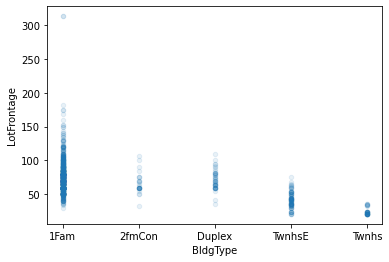

In [9]:
# let's see what is the best predictor for LotFrontage
# corr_matrix = my_data_exp.corr()
# print(corr_matrix["LotFrontage"].sort_values(ascending=False))

# copied from handson ML book
import matplotlib.pyplot as plt
my_data.plot(kind="scatter", x="BldgType", y="LotFrontage", alpha=0.1)

# It turns out that houses with the same BldgType tends to have similar LotFrontage size

In [10]:
# First, encode missing values of LotFrontage to the mean of LonFrontage
# so we can compare if the model will perform better if we encode it using BldgType

In [11]:
from sklearn.model_selection import train_test_split

X = my_data.drop('SalePrice', axis=1)
y = my_data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(my_data, y, test_size=0.1)

In [12]:
# Get the error of baseline model

from sklearn.metrics import mean_absolute_error

average_saleprice = my_data["SalePrice"].mean()
baseline_test_predictions = [average_saleprice]*len(X_test)

mean_absolute_error(baseline_test_predictions, y_test)

# 58432.462225558265
# 68705.85115406268
# 61028.98129104897

63395.70491649466

In [13]:
# Get the first implementation of Random Forest with only LotFrontage as the predictor
# Compare performance of the model when missing values were only replaced by mean

LF_mean_train = X_train["LotFrontage"].copy()
LF_mean_test = X_test["LotFrontage"].copy()

LF_mean_train.fillna(LF_mean_train.mean(), inplace=True) # ref change
LF_mean_test.fillna(LF_mean_test.mean(), inplace=True)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(LF_mean_train.to_numpy().reshape(-1, 1), y_train)
rfc_predictions1 = rfc.predict(LF_mean_test.to_numpy().reshape(-1, 1))

mean_absolute_error(rfc_predictions1, y_test)

# Note: Reshape your data either using array.reshape(-1, 1)
# if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

68247.93150684932

In [14]:
# Get the mean LotFrontage per bldg type
# Use that to populate missing Lot Frontage values based on their building type

def FrontageFromBldgType(data):

    PredLF=[]
    l = 0
    Bldg_list = data["BldgType"].to_numpy()
    # Next step, if LotFrontage is NA, fill it will Pred_LF
    for rows in Bldg_list:
        Bldg_list[l].strip()
        if Bldg_list[l] == '1Fam':
            PredLF.append(np.mean(data.query("BldgType == '1Fam'")["LotFrontage"]))
        elif Bldg_list[l] == 'TwnhsE':
            PredLF.append(np.mean(data.query("BldgType == 'TwnhsE'")["LotFrontage"]))
        elif Bldg_list[l] == 'Duplex':
            PredLF.append(np.mean(data.query("BldgType == 'Duplex'")["LotFrontage"]))
        elif Bldg_list[l] == 'Twnhs':
            PredLF.append(np.mean(data.query("BldgType == 'Twnhs'")["LotFrontage"]))
        elif Bldg_list[l] == '2fmCon':
            PredLF.append(np.mean(data.query("BldgType == '2fmCon'")["LotFrontage"]))
        l += 1
    data.insert(2, "Pred_LF", PredLF)
    data["LotFrontage"].fillna(data["Pred_LF"], inplace=True)
    return data

In [15]:
# 2nd implem of RFC, with LotFrontage NA filled from BldgType

LF_BldgType_train = X_train.copy()
LF_BldgType_test = X_test.copy()

FrontageFromBldgType(LF_BldgType_train) # the error starts here
FrontageFromBldgType(LF_BldgType_test)

# Fill null values of LotFrontage with the row's Pred_LF
#LF_BldgType_train["LotFrontage"].fillna(LF_BldgType_train["Pred_LF"], inplace=True)
#LF_BldgType_test["LotFrontage"].fillna(LF_BldgType_test["Pred_LF"], inplace=True)

,Id,MSSubClass,Pred_LF,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,75.180000,RL,62.000000,7917,Pave,None,Reg,Lvl,...,0,None,None,None,0,8,2007,WD,Normal,175000
1036,1037,20,75.180000,RL,89.000000,12898,Pave,None,IR1,HLS,...,0,None,None,None,0,9,2009,WD,Normal,315500
4,5,60,75.180000,RL,84.000000,14260,Pave,None,IR1,Lvl,...,0,None,None,None,0,12,2008,WD,Normal,250000
1357,1358,20,75.180000,RL,75.180000,12537,Pave,None,IR1,Lvl,...,0,None,None,None,0,4,2010,WD,Normal,149900
943,944,90,81.666667,RL,100.000000,25000,Pave,None,Reg,Low,...,0,None,None,None,0,6,2007,WD,Normal,143000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,130,20,75.180000,RL,69.000000,8973,Pave,None,Reg,Lvl,...,0,None,MnWw,None,0,7,2006,WD,Abnorml,150000
1055,1056,20,75.180000,RL,104.000000,11361,Pave,None,Reg,Lvl,...,0,None,MnPrv,None,0,5,2008,COD,Abnorml,180000
569,570,90,81.666667,RL,81.666667,7032,Pave,None,IR1,Lvl,...,0,None,None,None,0,12,2006,WD,Normal,135960
581,582,20,75.180000,RL,98.000000,12704,Pave,None,Reg,Lvl,...,0,None,None,None,0,8,2009,New,Partial,253293


In [16]:
LF_BldgType_train = LF_BldgType_train["LotFrontage"]
LF_BldgType_test = LF_BldgType_test["LotFrontage"]

rfc.fit(LF_BldgType_train.to_numpy().reshape(-1, 1), y_train)
rfc_predictions2 = rfc.predict(LF_BldgType_test.to_numpy().reshape(-1, 1))

mean_absolute_error(rfc_predictions2, y_test)

# Error when using the mean of LotFrontage: 67143.47260273973 | 74434.67808219178 | 73076.14383561644
# 56020.19863013698 | 71501.09589041096
# Error when using BldgType to fillna LotFrontage: 65911.71917808219 | 86550.39726027397 | 77735.97945205479
# 57029.82876712329 | 61955.80136986302

# This investigation has confirmed that LotFrontage becomes a better predictor
# When the missing values are filled using BldgType **DABS**
# Actually no, when I tried it again, the results changed (high variance)
    # this happened when I inserted fillna in the function
    # it used to be separated
    # Now it consistently shows that when BldgType is used, the model performed worse
    # it keeps changing, it's hard to know
    # maybe I should do this in the end instead

83029.17123287672

In [17]:
# For now, we just use BldgType first
    # We can change this in the future, I can test again the Random Forest performance
    # including the other variables

FrontageFromBldgType(X_train)
FrontageFromBldgType(X_test)

,Id,MSSubClass,Pred_LF,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,75.180000,RL,62.000000,7917,Pave,None,Reg,Lvl,...,0,None,None,None,0,8,2007,WD,Normal,175000
1036,1037,20,75.180000,RL,89.000000,12898,Pave,None,IR1,HLS,...,0,None,None,None,0,9,2009,WD,Normal,315500
4,5,60,75.180000,RL,84.000000,14260,Pave,None,IR1,Lvl,...,0,None,None,None,0,12,2008,WD,Normal,250000
1357,1358,20,75.180000,RL,75.180000,12537,Pave,None,IR1,Lvl,...,0,None,None,None,0,4,2010,WD,Normal,149900
943,944,90,81.666667,RL,100.000000,25000,Pave,None,Reg,Low,...,0,None,None,None,0,6,2007,WD,Normal,143000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,130,20,75.180000,RL,69.000000,8973,Pave,None,Reg,Lvl,...,0,None,MnWw,None,0,7,2006,WD,Abnorml,150000
1055,1056,20,75.180000,RL,104.000000,11361,Pave,None,Reg,Lvl,...,0,None,MnPrv,None,0,5,2008,COD,Abnorml,180000
569,570,90,81.666667,RL,81.666667,7032,Pave,None,IR1,Lvl,...,0,None,None,None,0,12,2006,WD,Normal,135960
581,582,20,75.180000,RL,98.000000,12704,Pave,None,Reg,Lvl,...,0,None,None,None,0,8,2009,New,Partial,253293


In [18]:
nullseries = X_train.isnull().sum()
print(nullseries[nullseries > 0])

# The only null value left is 1 - Electrical

Electrical    1
dtype: int64


In [19]:
# removes the row with null values for Electrical
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)

In [20]:
X_train_exp = X_train.copy()
X_test_exp = X_test.copy()

X_train_OH = X_train.copy()
X_test_OH = X_test.copy()
# For data visualizations: my_data_exp
# For experimental encoding: X_train_exp, X_test_exp
# For one hot encoding: X_train_OH, X_test_OH

## **START OF CATEGORICAL ENCODING**

In [21]:
# For features with these categories: None, Po, Fa, TA, Gd, Ex

def categ_seq1(column):
    Types = ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']

    n = 0
    for rows in column:
        column.iloc[n].strip() #remove whitespaces
        column.iloc[n] = Types.index(column.iloc[n])
        n += 1

In [22]:
# applying the function
# BsmtQual, BsmtCond, FireplaceQu, GarageQual, GarageCond, PoolQC
# also: ExterQual, ExterCond, HeatingQC, KitchenQual
# this is all good (yay!)

# SURE
#categ_seq1(X_train_exp["BsmtQual"])
#categ_seq1(X_train_exp["BsmtCond"])
#categ_seq1(X_train_exp["FireplaceQu"])
#categ_seq1(X_train_exp["GarageQual"])
#categ_seq1(X_train_exp["GarageCond"])
#categ_seq1(X_train_exp["PoolQC"])
#categ_seq1(X_train_exp["ExterQual"])
#categ_seq1(X_train_exp["ExterCond"])
#categ_seq1(X_train_exp["HeatingQC"])
# categ_seq1(X_train_exp["KitchenQual"])

#categ_seq1(X_test_exp["BsmtQual"])
#categ_seq1(X_test_exp["BsmtCond"])
#categ_seq1(X_test_exp["FireplaceQu"])
#categ_seq1(X_test_exp["GarageQual"])
#categ_seq1(X_test_exp["GarageCond"])
#categ_seq1(X_test_exp["PoolQC"])
#categ_seq1(X_test_exp["ExterQual"])
#categ_seq1(X_test_exp["ExterCond"])
#categ_seq1(X_test_exp["HeatingQC"])
# categ_seq1(X_test_exp["KitchenQual"])

#categ_seq1(X_train_OH["BsmtQual"])
#categ_seq1(X_train_OH["BsmtCond"])
#categ_seq1(X_train_OH["FireplaceQu"])
#categ_seq1(X_train_OH["GarageQual"])
#categ_seq1(X_train_OH["GarageCond"])
#categ_seq1(X_train_OH["PoolQC"])
#categ_seq1(X_train_OH["ExterQual"])
#categ_seq1(X_train_OH["ExterCond"])
#categ_seq1(X_train_OH["HeatingQC"])
# categ_seq1(X_train_OH["KitchenQual"])

#categ_seq1(X_test_OH["BsmtQual"])
#categ_seq1(X_test_OH["BsmtCond"])
#categ_seq1(X_test_OH["FireplaceQu"])
#categ_seq1(X_test_OH["GarageQual"])
#categ_seq1(X_test_OH["GarageCond"])
#categ_seq1(X_test_OH["PoolQC"])
#categ_seq1(X_test_OH["ExterQual"])
#categ_seq1(X_test_OH["ExterCond"])
#categ_seq1(X_test_OH["HeatingQC"])
# categ_seq1(X_test_OH["KitchenQual"])

In [23]:
def categ_seq2(Types, column):

    n = 0
    for rows in column:
        column.iloc[n].strip() #remove whitespaces
        column.iloc[n] = Types.index(column.iloc[n])
        n += 1

# function calls:
# Bsmt_arr = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']

# categ_seq2(Bsmt_arr, X_train_exp["BsmtFinType1"])
# categ_seq2(Bsmt_arr, X_test_exp["BsmtFinType1"])

# categ_seq2(Bsmt_arr, X_train_exp["BsmtFinType2"])
# categ_seq2(Bsmt_arr, X_test_exp["BsmtFinType2"])

# categ_seq2(Bsmt_arr, X_train_OH["BsmtFinType1"])
# categ_seq2(Bsmt_arr, X_test_OH["BsmtFinType1"])

# categ_seq2(Bsmt_arr, X_train_OH["BsmtFinType2"])
# categ_seq2(Bsmt_arr, X_test_OH["BsmtFinType2"])

In [24]:
# For features with these categories:

# Street: Grvl, Pave
    # Street_arr = ['Grvl', 'Pave']
    # categ_seq2(Street_arr, X_train_exp["Street"])
    # categ_seq2(Street_arr, X_test_exp["Street"])
    # categ_seq2(Street_arr, X_train_OH["Street"])
    # categ_seq2(Street_arr, X_test_OH["Street"])
    
# LotShape: IR3, IR2, IR1, Reg
    # LotShape_arr = ['IR3', 'IR2', 'IR1', 'Reg']
    # categ_seq2(LotShape_arr, X_train_exp["LotShape"])
    # categ_seq2(LotShape_arr, X_test_exp["LotShape"])
    # categ_seq2(LotShape_arr, X_train_OH["LotShape"])
    # categ_seq2(LotShape_arr, X_test_OH["LotShape"])

# Utilities: ELO, NoSeWa, NoSewr, AllPub
    # Utilities_arr = ['ELO', 'NoSeWa', 'NoSewr', 'AllPub']
    # categ_seq2(Utilities_arr, X_train_exp["Utilities"])
    # categ_seq2(Utilities_arr, X_test_exp["Utilities"])
    # categ_seq2(Utilities_arr, X_train_OH["Utilities"])
    # categ_seq2(Utilities_arr, X_test_OH["Utilities"])

# BsmtExposure: None, No, Mn, Av, Gd
    # BsmtExp_arr = ['None', 'No', 'Mn', 'Av', 'Gd']
    # categ_seq2(BsmtExp_arr, X_train_exp["BsmtExposure"])
    # categ_seq2(BsmtExp_arr, X_test_exp["BsmtExposure"])
    # categ_seq2(BsmtExp_arr, X_train_OH["BsmtExposure"])
    # categ_seq2(BsmtExp_arr, X_test_OH["BsmtExposure"])

# Alley: None, Grvl, Pave
    # Alley_arr = ['None', 'Grvl', 'Pave']
    # categ_seq2(Alleyarr, X_train_exp["Alley"])
    # categ_seq2(Alleyarr, X_test_exp["Alley"])
    # categ_seq2(Alleyarr, X_train_OH["Alley"])
    # categ_seq2(Alleyarr, X_test_OH["Alley"])

# NOTE!!!!
# Remember to put 'None' to the null values of all the features with 'None category'
# because initially, i only filled 'None' to those with missing values in the train set
    
# CentralAir: N, Y
    # CentralAir_arr = ['N', 'Y']
    # categ_seq2(CentralAir_arr, X_train_exp["CentralAir"])
    # categ_seq2(CentralAir_arr, X_test_exp["CentralAir"])
    # categ_seq2(CentralAir_arr, X_train_OH["CentralAir"])
    # categ_seq2(CentralAir_arr, X_test_OH["CentralAir"])

# Functional: Sal, Sev, Maj2, Maj1, Mod, Min2, Min1, Typ
    # Functional_arr = ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']
    # categ_seq2(Functional_arr, X_train_exp["Functional"])
    # categ_seq2(Functional_arr, X_test_exp["Functional"])
    # categ_seq2(Functional_arr, X_train_OH["Functional"])
    # categ_seq2(Functional_arr, X_test_OH["Functional"])

# GarageType: None, CarPort, Detchd, BuiltIn, Basment, Attchd, 2Types
    # GarageType_arr = ['None', 'CarPort', 'Detchd', 'BuiltIn', 'Basment', 'Attchd', '2Types']
    # categ_seq2(GarageType_arr, X_train_exp["GarageType"])
    # categ_seq2(GarageType_arr, X_test_exp["GarageType"])
    # categ_seq2(GarageType_arr, X_train_OH["GarageType"])
    # categ_seq2(GarageType_arr, X_test_OH["GarageType"])

# GarageFinish: None, Unf, RFn, Fin
    # GarageFinish_arr = ['None', 'Unf', 'RFn', 'Fin']
    # categ_seq2(GarageFinish_arr, X_train_exp["GarageFinish"])
    # categ_seq2(GarageFinish_arr, X_test_exp["GarageFinish"])
    # categ_seq2(GarageFinish_arr, X_train_OH["GarageFinish"])
    # categ_seq2(GarageFinish_arr, X_test_OH["GarageFinish"])

# PavedDrive: N, P, Y
    # PavedDrive_arr = ['N', 'P', 'Y']
    # categ_seq2(PavedDrive_arr, X_train_exp["PavedDrive"])
    # categ_seq2(PavedDrive_arr, X_test_exp["PavedDrive"])
    # categ_seq2(PavedDrive_arr, X_train_OH["PavedDrive"])
    # categ_seq2(PavedDrive_arr, X_test_OH["PavedDrive"])

# Fence: None, MnWw, GdWo, MnPrv, GdPrv
    # Fence_arr = ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']
    # categ_seq2(Fence_arr, X_train_exp["Fence"])
    # categ_seq2(Fence_arr, X_test_exp["Fence"])
    # categ_seq2(Fence_arr, X_train_OH["Fence"])
    # categ_seq2(Fence_arr, X_test_OH["Fence"])

#--------------------------------------------------------------------------------------------------------------------
# Verdict (sure):
    # MSSubClass: don't do anything
    
#----------------------------------- unsure: made via investigation
# Verdict:
    # LotConfig: 0 for non-cds, 1 for cds
    # BldgType: (2fam, Duplex, Twnhs,) 0 (TwnhsE,) 1 (1fam) 1.5
    #-------------------------------------------
#------------------------------------------------------------------------------------------------------------------------
# UNSURE VERDICTS VIA INVESTIGATION
# these are the variables that will be one hot encoded for X_train_OH and X_test_OH

# Condition1 & 2: PosA, PosN, Norm, RRNn, RRNe, RRAn, RRAe, Feedr, Artery
    # Cond_arr = ['PosA', 'PosN', 'Norm', RRNn', 'RRNe', 'RRAn', 'RRAe', 'Feedr', 'Artery']
    # categ_seq2(Cond_arr, X_train_exp["Condition1"])
    # categ_seq2(Cond_arr, X_test_exp["Condition1"])
    # categ_seq2(Cond_arr, X_train_exp["Condition2"])
    # categ_seq2(Cond_arr, X_test_exp["Condition2"])

# LandSlope: Gtl, Mod, Sev
    # LandS_arr = ['Gtl', 'Mod', 'Sev']
    # categ_seq2(LandS_arr, X_train_exp["LandSlope"])
    # categ_seq2(LandS_arr, X_test_exp["LandSlope"])

# HouseStyle: 1Story, 1.5Unf, 1.5Fin, 2Story, SFoyer, 2.5Unf, 2.5Fin, SLvl 
    # HouseS_arr = ['1Story', '1.5Unf', '1.5Fin', '2Story', 'SFoyer', '2.5Unf', '2.5Fin', 'SLvl']
    # categ_seq2(HouseS_arr, X_train_exp['HouseStyle'])
    # categ_seq2(HouseS_arr, X_test_exp['HouseStyle'])

# RoofStyle: shed, flat, gable, hip, gambrel, mansard
    # RoofS_arr = ['shed', 'flat', 'gable', 'hip', 'gambrel', 'mansard']
    # categ_seq2(RoofS_arr, X_train_exp['RoofStyle'])
    # categ_seq2(RoofS_arr, X_test_exp['RoofStyle'])

# RoofMatl: Roll, CompShg, Tar&Grv, Membran, WdShngl, Metal, WdShake, Clytile
    # RoofM_arr = ['Roll', 'CompShg', 'Tar&Grv', 'Membran', 'WdShngl', 'Metal', 'WdShake', 'Clytile']
    # categ_seq2(RoofM_arr, X_train_exp['RoofMatl'])
    # categ_seq2(RoofM_arr, X_test_exp['RoofMatl'])

# MasVnrType: None, CBlock, BrkCmn, BrkFace, Stone
    # MVT_arr = ['None', 'CBlock', 'BrkCmn', 'BrkFace', 'Stone']
    # categ_seq2(MVT_arr, X_train_exp['MasVnrType'])
    # categ_seq2(MVT_arr, X_test_exp['MasVnrType'])

# Foundation: Slab, BrkTil, CBlock, Wood, Stone, PConc
    # Found_arr = ['Slab', 'BrkTil', 'CBlock', 'Wood', 'Stone', 'PConc']
    # categ_seq2(Found_arr, X_train_exp['Foundation'])
    # categ_seq2(Found_arr, X_test_exp['Foundation'])

# Electrical: Mix, FuseP, FuseF, FuseA, SBrkr
    # Elec_arr = ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr']
    # categ_seq2(Elec_arr, X_train_exp['Electrical'])
    # categ_seq2(Elec_arr, X_test_exp['Electrical'])

# MiscFeature: None, Othr, Gar2, Shed, Elev, TenC
    # MiscF_arr = ['None', 'Othr', 'Gar2', 'Shed', 'Elev', 'TenC']
    # categ_seq2(MiscF_arr, X_train_exp['MiscFeature'])
    # categ_seq2(MiscF_arr, X_test_exp['MiscFeature'])

In [25]:
# for features with unknown category order
# Create a function that automates ordinal encoding for categorical variables
# putting the highest index on one with the greatest mean for the target variable

import operator
from collections import OrderedDict

def categ_sort(data, column):
    Types = column.unique()
    categ_dict = {}
    m = 0
    for item in Types:
        mean_item = np.mean(data[column == Types[m]]["SalePrice"])
        categ_dict[Types[m]] = mean_item
        m += 1
    # Sort the dictionary into ascending order | higher value = higher index
    # copied from: https://stackabuse.com/how-to-sort-dictionary-by-value-in-python/
    sorted_tuples = sorted(categ_dict.items(), key=operator.itemgetter(1))
    sorted_dict = OrderedDict()
    for k, v in sorted_tuples:
        sorted_dict[k] = v

    sorted_list = list(sorted_dict.keys()) # sorted variables list
    # Replace the category in the dataframe based on their index in the dictionary
    n = 0
    for rows in column:
        column.iloc[n].strip() #remove whitespaces
        column.iloc[n] = sorted_list.index(column.iloc[n])
        n += 1

In [26]:
# Temp for SaleCondition: use categ_sort
# Temp for Ext2 and Ext2: categ_sort (shud be research but i'm lazy)
# Temp for MSZoning: categ_sort
# Temp for LandContour: categ_sort
# Temp for Heating: use categ_sort
# Temp for SaleType: use categ_sort
#-----------------------------------------------
# categ_sort(X_train_exp, X_train_exp['SaleCondition'])
# categ_sort(X_train_exp, X_train_exp['Exterior1st'])
# categ_sort(X_train_exp, X_train_exp['Exterior2nd'])
# categ_sort(X_train_exp, X_train_exp['MSZoning'])
# categ_sort(X_train_exp, X_train_exp['LandContour'])
# categ_sort(X_train_exp, X_train_exp['Heating'])
# categ_sort(X_train_exp, X_train_exp['SaleType'])

# categ_sort(X_test_exp, X_test_exp['SaleCondition'])
# categ_sort(X_test_exp, X_test_exp['Exterior1st'])
# categ_sort(X_test_exp, X_test_exp['Exterior2nd'])
# categ_sort(X_test_exp, X_test_exp['MSZoning'])
# categ_sort(X_test_exp, X_test_exp['LandContour'])
# categ_sort(X_test_exp, X_test_exp['Heating'])
# categ_sort(X_test_exp, X_test_exp['SaleType'])

# For one-hot encoding: 
# Condition1 & 2, LandSlope, HouseStyle, RoofStyle, RoofMatl, MasVnrType, Foundation, Electrical, MiscFeature
# SaleCondition, Exterior1st, Exterior2nd, MSZoning, LandContour, Heating, SaleType

In [27]:
toOneHot = ['Condition1', 'Condition2', 'LandSlope', 
        'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'Foundation',
       'Electrical', 'MiscFeature', 'SaleCondition', 'Exterior1st', 'Exterior2nd', 
        'MSZoning', 'LandContour', 'Heating', 'SaleType']

train_OH_var_df = X_train_OH[toOneHot].copy()

test_OH_var_df = X_test_OH[toOneHot].copy()

In [28]:
def name_concat(data):
    n = 0
    titles_arr = list(data.columns) # Creates an array of column names
    for titles_arr[n] in titles_arr: # goes through each items in the column names array
        p = 0
        for data[titles_arr[n]].iloc[p] in data[titles_arr[n]]: # goes through each row in the column
            data[titles_arr[n]].iloc[p] = titles_arr[n] + data[titles_arr[n]].iloc[p]
            p += 1
        n += 1

In [29]:
name_concat(train_OH_var_df)
name_concat(test_OH_var_df)

In [50]:
# One hot encoding

from sklearn.preprocessing import OneHotEncoder

# copied from: https://www.youtube.com/watch?v=InZ0n2knz1E

ohe = OneHotEncoder()

# before one hot encoding, concatenate the column name to each of the rows

def OH_func(data):
    OH_features_arr = ohe.fit_transform(data).toarray() # one hot encodes the features
    OH_features_labels = ohe.categories_ # the labels
    p = 0
    
    OH_labels = []
    for OH_features_labels[p] in OH_features_labels:
        temp_list = OH_features_labels[p].tolist()
        q = 0
        for temp_list[q] in temp_list:
            OH_labels.append(OH_features_labels[p][q])
            q += 1
        p += 1
        
    data = pd.DataFrame(data, columns = OH_labels)

In [51]:
OH_func(train_OH_var_df)
OH_func(test_OH_var_df)

In [32]:
# Next Action: Drop the encoded features from X_train_OH and concat OH_features_df to it
def drop_concat(data1, data2, toDrop):
    data1.drop(toDrop, axis=1, inplace=True)

    data1.index = data2.index
    data1 = pd.concat([data1, data2], axis=1)

drop_concat(X_train_OH, train_OH_var_df, toOneHot)
drop_concat(X_test_OH, test_OH_var_df, toOneHot)

In [52]:
train_OH_var_df.head()

,Condition1,Condition2,LandSlope,HouseStyle,RoofStyle,RoofMatl,MasVnrType,Foundation,Electrical,MiscFeature,SaleCondition,Exterior1st,Exterior2nd,MSZoning,LandContour,Heating,SaleType
973,Condition1Norm,Condition2Norm,LandSlopeGtl,HouseStyle1Story,RoofStyleGable,RoofMatlCompShg,MasVnrTypeNone,FoundationPConc,ElectricalSBrkr,MiscFeatureNone,SaleConditionPartial,Exterior1stCemntBd,Exterior2ndCmentBd,MSZoningFV,LandContourLvl,HeatingGasA,SaleTypeNew
333,Condition1Norm,Condition2Norm,LandSlopeGtl,HouseStyle1Story,RoofStyleGable,RoofMatlCompShg,MasVnrTypeStone,FoundationPConc,ElectricalSBrkr,MiscFeatureNone,SaleConditionNormal,Exterior1stVinylSd,Exterior2ndVinylSd,MSZoningRM,LandContourLvl,HeatingGasA,SaleTypeWD
962,Condition1Norm,Condition2Norm,LandSlopeGtl,HouseStyle2Story,RoofStyleGable,RoofMatlCompShg,MasVnrTypeNone,FoundationCBlock,ElectricalSBrkr,MiscFeatureNone,SaleConditionNormal,Exterior1stPlywood,Exterior2ndBrk Cmn,MSZoningRL,LandContourLvl,HeatingGasA,SaleTypeWD
186,Condition1Norm,Condition2Norm,LandSlopeGtl,HouseStyleSLvl,RoofStyleGable,RoofMatlCompShg,MasVnrTypeNone,FoundationPConc,ElectricalSBrkr,MiscFeatureNone,SaleConditionNormal,Exterior1stHdBoard,Exterior2ndHdBoard,MSZoningRL,LandContourLvl,HeatingGasA,SaleTypeWD
851,Condition1Norm,Condition2Norm,LandSlopeGtl,HouseStyle1Story,RoofStyleGable,RoofMatlCompShg,MasVnrTypeBrkFace,FoundationPConc,ElectricalSBrkr,MiscFeatureNone,SaleConditionNormal,Exterior1stVinylSd,Exterior2ndVinylSd,MSZoningRL,LandContourLvl,HeatingGasA,SaleTypeWD


In [48]:
X_train_OH.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1313 entries, 973 to 671
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1313 non-null   int64  
 1   MSSubClass     1313 non-null   int64  
 2   Pred_LF        1313 non-null   float64
 3   LotFrontage    1313 non-null   float64
 4   LotArea        1313 non-null   int64  
 5   Street         1313 non-null   object 
 6   Alley          1313 non-null   object 
 7   LotShape       1313 non-null   object 
 8   Utilities      1313 non-null   object 
 9   LotConfig      1313 non-null   object 
 10  Neighborhood   1313 non-null   object 
 11  BldgType       1313 non-null   object 
 12  OverallQual    1313 non-null   int64  
 13  OverallCond    1313 non-null   int64  
 14  MasVnrArea     1313 non-null   object 
 15  ExterQual      1313 non-null   object 
 16  ExterCond      1313 non-null   object 
 17  BsmtQual       1313 non-null   object 
 18  BsmtCon

In [33]:
# Next steps:
    #     (1) Apply OH encoding to test set
    #     (2) Perform time series encoding
    #     (3) Scale
    #     (4) Remove comment sign to the categorical encoding to fully encode it
    #     (5) Filter the features and see if the same features will be filtered out in the different
    #     training sets (if yes, that's a good sign)

### Time Series Encoding

In [34]:
# To be applied to all: X_train_exp, X_test_exp, X_train_OH, X_test_OH

# For variables: YearBuilt, YearRemodAdd, GarageYrBlt
# YearBuilt -> House Age
# YearRemodAdd -> Newly remodelled? Remodel Age
# GarageYrBlt -> GarageAge

In [35]:
from datetime import date

def age(data, var):
    n = 0
    new_var = []
    for data[var].iloc[n] in data[var]:
        try: new_var.append(date.today().year - data[var].iloc[n]) # append instead
        except: new_var.append(data[var].iloc[n])
        n += 1
    data.drop([var], axis=1, inplace=True)
    # data.insert(2, "Pred_LF", PredLF)
    return new_var

X_train_exp['House_Age'] = age(X_train_exp, 'YearBuilt')
X_test_exp['House_Age'] = age(X_test_exp, 'YearBuilt')
X_train_OH['House_Age'] = age(X_train_OH, 'YearBuilt')
X_test_OH['House_Age'] = age(X_test_OH, 'YearBuilt')

X_train_exp['Remodel_Age'] = age(X_train_exp, 'YearRemodAdd')
X_test_exp['Remodel_Age'] = age(X_test_exp, 'YearRemodAdd')
X_train_OH['Remodel_Age'] = age(X_train_OH, 'YearRemodAdd')
X_test_OH['Remodel_Age'] = age(X_test_OH, 'YearRemodAdd')

X_train_exp['Garage_Age'] = age(X_train_exp, 'GarageYrBlt')
X_test_exp['Garage_Age'] = age(X_test_exp, 'GarageYrBlt')
X_train_OH['Garage_Age'] = age(X_train_OH, 'GarageYrBlt')
X_test_OH['Garage_Age'] = age(X_test_OH, 'GarageYrBlt')

C:\Users\Arvir\AppData\Local\Temp\ipykernel_3080\3455250183.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for data[var].iloc[n] in data[var]:
C:\Users\Arvir\AppData\Local\Temp\ipykernel_3080\3455250183.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for data[var].iloc[n] in data[var]:
C:\Users\Arvir\AppData\Local\Temp\ipykernel_3080\3455250183.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for data[var].iloc[n] in data[v

In [36]:
# Just checked if it worked
# X_train_OH.plot(kind="scatter", x='Garage_Age', y="SalePrice", alpha=0.1)
# Couldn't plot those with null values - I need to convert this to numerical but how

# Before I convert None to the rounded up value of the oldest age, I should confirm if there is
# indeed a reasonable linear relationship, suggesting that older garages are cheaper

# it didn't show that old garages are cheaper because it looks like there is only a very few
# old garages in the dataset, it however showed that No garages are relatively cheap
# and new garages are expensive

# Bin the garage age, get the mean saleprice, put none values together with the bin that
# has the nearest mean to it

# NEXT STEP: BINNING

In [37]:
# this part creates a copy of the train and test set that only contains Garage Age
# this is what we will manipulate, with the goal of finding out what to replace the 'None' values
# in the train and test set

X_train_OH_NoNan = X_train_OH[['Garage_Age', 'SalePrice']].copy()
X_test_OH_NoNan = X_test_OH[['Garage_Age', 'SalePrice']].copy()

In [38]:
# this function, convert the none values to 1000 (a very high number)
# and then sorts the dataframe

def N2zero(data, var):
    g = 0
    for data[var].iloc[g] in data[var]:
        if data[var].iloc[g] == 'None':
            data[var].iloc[g] = 1000
        g += 1
    return data

X_train_OH_NoNan = N2zero(X_train_OH_NoNan, 'Garage_Age')
X_test_OH_NoNan = N2zero(X_test_OH_NoNan, 'Garage_Age')

C:\Users\Arvir\AppData\Local\Temp\ipykernel_3080\4246824114.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for data[var].iloc[g] in data[var]:
C:\Users\Arvir\AppData\Local\Temp\ipykernel_3080\4246824114.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[var].iloc[g] = 1000


In [39]:
# I'm done coding the binning part, need to undo the conversion of None
# get the means of each bin / None
    # will kmeans work if there is None
    # It did not work
    # I will need to create a temporary dataframe without the none values
# Replace None with the bin that has the nearest mean

from sklearn.preprocessing import KBinsDiscretizer

bin = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')

X_train_OH_NoNan_GA = bin.fit_transform(X_train_OH_NoNan['Garage_Age'].to_numpy().reshape(-1, 1))
X_test_OH_NoNan_GA = bin.fit_transform(X_test_OH_NoNan['Garage_Age'].to_numpy().reshape(-1, 1))
# Xt = est.transform(X)

C:\Users\Arvir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Arvir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [40]:
X_train_OH_NoNan_GA.tolist()
X_test_OH_NoNan_GA.tolist() 
# get the mean of each bin
# get the mean of the 1000s
# I should've included SalePrice in this

# get the mean of X_train_OH_NaN["SalePrice"]

[[0.0],
 [0.0],
 [0.0],
 [1.0],
 [1.0],
 [0.0],
 [4.0],
 [0.0],
 [0.0],
 [0.0],
 [3.0],
 [1.0],
 [2.0],
 [1.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [2.0],
 [0.0],
 [1.0],
 [0.0],
 [2.0],
 [0.0],
 [0.0],
 [4.0],
 [1.0],
 [0.0],
 [0.0],
 [3.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [1.0],
 [1.0],
 [0.0],
 [0.0],
 [1.0],
 [2.0],
 [2.0],
 [1.0],
 [0.0],
 [3.0],
 [0.0],
 [2.0],
 [4.0],
 [1.0],
 [1.0],
 [0.0],
 [1.0],
 [0.0],
 [1.0],
 [2.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [1.0],
 [1.0],
 [0.0],
 [0.0],
 [0.0],
 [2.0],
 [1.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [1.0],
 [0.0],
 [1.0],
 [2.0],
 [2.0],
 [0.0],
 [1.0],
 [0.0],
 [2.0],
 [1.0],
 [0.0],
 [0.0],
 [3.0],
 [2.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0],
 [2.0],
 [1.0],
 [2.0],
 [1.0],
 [0.0],
 [3.0],
 [0.0],
 [1.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [2.0],
 [2.0],
 [0.0],
 [3.0],
 [1.0],
 [1.0],
 [1.0],
 [4.0],
 [0.0],
 [3.0],
 [4.0],
 [1.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [2.0],
 [0.0],
 [1.0],
 [2.0],
 [0.0],
 [0.0],
 [2.0],


In [41]:
# insert X_train_OH_NoNan_GA in the dataframe
X_train_OH_NoNan.insert(2, "GA_binned", X_train_OH_NoNan_GA)
X_test_OH_NoNan.insert(2, "GA_binned", X_test_OH_NoNan_GA)

In [42]:
X_train_OH_NoNan["GA_binned"].value_counts()
X_test_OH_NoNan["GA_binned"].value_counts()

# To see the mean of each bin:
    # print("bin 0:", np.mean(X_test_OH_NoNan[X_test_OH_NoNan["GA_binned"] == 0]["Garage_Age"]))
    # print("bin 1:", np.mean(X_test_OH_NoNan[X_test_OH_NoNan["GA_binned"] == 1]["Garage_Age"]))
    # print("bin 2:", np.mean(X_test_OH_NoNan[X_test_OH_NoNan["GA_binned"] == 2]["Garage_Age"]))
    # print("bin 3:", np.mean(X_test_OH_NoNan[X_test_OH_NoNan["GA_binned"] == 3]["Garage_Age"]))
    # print("bin 4:", np.mean(X_test_OH_NoNan[X_test_OH_NoNan["GA_binned"] == 4]["Garage_Age"]))

# bin 4 is purely 1000 a.k.a. the None's (both for train and test)
# next step -> one hot encode

0.0    66
1.0    41
2.0    22
3.0    10
4.0     7
Name: GA_binned, dtype: int64

In [43]:
X_train_OH_Enc = X_train_OH_NoNan["GA_binned"].copy()
X_test_OH_Enc = X_test_OH_NoNan["GA_binned"].copy()

In [45]:
def OH_simple(data, labels, output, toDrop):
    GA_binned_arr = ohe.fit_transform(data.to_numpy().reshape(-1, 1)).toarray() # one hot encodes the features
    data = pd.DataFrame(GA_binned_arr, columns = labels)

    output.drop(toDrop, axis=1)
    output = pd.concat([output, data], axis=1)

In [46]:
GA_bin = ['Garage_Age_bin1', 'Garage_Age_bin2', 'Garage_Age_bin3', 'Garage_Age_bin4', 'Garage_Age_bin5']
OH_simple(X_train_OH_Enc, GA_bin, X_train_OH, 'Garage_Age')
OH_simple(X_test_OH_Enc, GA_bin, X_test_OH, 'Garage_Age')

# Next Action:
# One hot encode all the unsure variables for X_train_OH

In [47]:
X_train_OH.head()

# CURRENT PROBLEM - THE OTHER VARIABLES FOR _OH IS NOT ENCODED PROPERLY
# MY FIRST FUNCTION FOR OHE WASN'T WORKING

# Next:
    # To check which variables can be binned, i can create a function that displays the min and max of each var
        # (or maybe std??)

,Id,MSSubClass,Pred_LF,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePrice,House_Age,Remodel_Age,Garage_Age
973,974,20,74.427293,95.000000,11639,Pave,None,Reg,AllPub,Corner,...,0,None,None,0,12,2008,182000,15,14,15.0
333,334,120,41.768293,59.000000,8198,Pave,None,Reg,AllPub,FR3,...,0,None,None,0,7,2008,207000,18,18,18.0
962,963,160,41.768293,24.000000,2308,Pave,None,Reg,AllPub,Corner,...,0,None,None,0,7,2007,155000,46,46,46.0
186,187,80,74.427293,74.427293,9947,Pave,None,IR1,AllPub,CulDSac,...,0,None,GdPrv,0,6,2009,173000,32,31,32.0
851,852,120,41.768293,41.768293,3196,Pave,None,Reg,AllPub,Inside,...,0,None,None,0,5,2006,215000,19,19,19.0


In [ ]:
# **Apply the same things on the test set

## **Appendix: Investigations**

In [ ]:
# function calls for the ordinal variables
# I identified the ordinal values by investigating the data description
# Double check the ############## first if there are no errors (### randomly selected)
# I investigated some of the variables and find that sometimes it's not realiable to rank them
    # I checked if the ordering in the newly generated encoding reflected the inherent
    # order of the variable
        # check value counts first, see the graph (categ_inv), do categ_sort then compare
# according to mean
# for example, the variable PoolQC has ranked fair better than good
# another problem is some variables have the category "poor" in the test set but not in 
# the train set

# with that, I will just decide the ordering for those variables with clear order
# i will use the categ_sort function for those with no clear order such as - Neighborhood
    # but first i will investigate them
    
# Categ variables not treated yet: Neighborhood, Mosold, Yrsold, YearBuilt, YearRemodAdd

In [ ]:
# Investigating other categorical values
# from matplotlib.pyplot import figure

def categ_inv(data, column):
    Types = column.unique()
    categ_dict = {}
    o = 0
    for item in Types:
        Types[o] = str(Types[o])
        mean_item = np.mean(data[column == Types[o]]["SalePrice"])
        categ_dict[Types[o]] = mean_item
        o += 1
    # Sort the dictionary into ascending order | higher value = higher index
    # copied from: https://stackabuse.com/how-to-sort-dictionary-by-value-in-python/
    sorted_tuples = sorted(categ_dict.items(), key=operator.itemgetter(1))
    sorted_dict = OrderedDict()
    for k, v in sorted_tuples:
        sorted_dict[k] = v

    sorted_k = list(sorted_dict.keys()) # sorted variables list
    sorted_v = list(sorted_dict.values()) # sorted values list
    plt.plot(sorted_k,sorted_v,'bo-')   
    plt.figure(figsize=(20, 4))
    plt.show()

In [ ]:
# Investigating Condition

#categ_inv(X_train, X_train["Condition1"])
#categ_inv(X_train, X_train["Condition2"])

# concat condition1 and condition2 to Condition

def concat(data, column1, column2):
    n = 0
    column = []
    for rows in column1:
        row = str(column1.iloc[n]) + str(column2.iloc[n])
        column.append(row)
        n += 1
    data.insert(2, "Column_Temp", column)
    return data

# value counts
# categ_inv

concat(my_data_exp, my_data_exp["Condition1"], my_data_exp["Condition2"])
my_data_exp["Column_Temp"].value_counts()

In [ ]:
# Investigation of Condition1 and Condition2

print('NormNorm:     ', np.mean(my_data_exp.query("Column_Temp == 'NormNorm'")["SalePrice"]))
print('FeedrNorm:     ', np.mean(my_data_exp.query("Column_Temp == 'FeedrNorm'")["SalePrice"]))
print('ArteryNorm:     ', np.mean(my_data_exp.query("Column_Temp == 'ArteryNorm'")["SalePrice"]))
print('RRAnNorm:     ', np.mean(my_data_exp.query("Column_Temp == 'RRAnNorm'")["SalePrice"]))
print('PosNNorm:     ', np.mean(my_data_exp.query("Column_Temp == 'PosNNorm'")["SalePrice"]))
print('RRAeNorm:     ', np.mean(my_data_exp.query("Column_Temp == 'RRAeNorm'")["SalePrice"]))
print('PosANorm:     ', np.mean(my_data_exp.query("Column_Temp == 'PosANorm'")["SalePrice"]))
print('---------------------------------')
print('RRNnNorm:     ', np.mean(my_data_exp.query("Column_Temp == 'RRNnNorm'")["SalePrice"]))
print('FeedrRRNn:     ', np.mean(my_data_exp.query("Column_Temp == 'FeedrRRNn'")["SalePrice"]))
print('ArteryArtery:     ', np.mean(my_data_exp.query("Column_Temp == 'ArteryArtery'")["SalePrice"]))
print('PosNPosN:     ', np.mean(my_data_exp.query("Column_Temp == 'PosNPosN'")["SalePrice"]))
print('RRNeNorm:     ', np.mean(my_data_exp.query("Column_Temp == 'RRNeNorm'")["SalePrice"]))
print('RRAnFeedr:     ', np.mean(my_data_exp.query("Column_Temp == 'RRAnFeedr'")["SalePrice"]))
print('RRNnFeedr:     ', np.mean(my_data_exp.query("Column_Temp == 'RRNnFeedr'")["SalePrice"]))
print('FeedrRRAe:     ', np.mean(my_data_exp.query("Column_Temp == 'FeedrRRAe'")["SalePrice"]))
print('FeedrFeedr:     ', np.mean(my_data_exp.query("Column_Temp == 'FeedrFeedr'")["SalePrice"]))
print('FeedrRRAn:     ', np.mean(my_data_exp.query("Column_Temp == 'FeedrRRAn'")["SalePrice"]))
print('ArteryPosA:     ', np.mean(my_data_exp.query("Column_Temp == 'ArteryPosA'")["SalePrice"]))

# ArteryPosA - 325
# PosNPosN - 284
# RRNnNorm - 233
# PosANorm - 225 ***
# PosNNorm - 206 ***
# RRNeNorm - 190
# FeedrRRAe - 190
# RRAnNorm - 183 ***
# NormNorm - 183 ***
# RRAnFeedr- 147
# FeedrNorm - 145 ***
# RRAeNorm - 141 ***
# FeedrRRAn - 136
# ArteryNorm - 133 ***
# RRNnFeedr - 128
# ArteryArtery - 106
# FeedrRRNn - 96
# FeedrFeedr - 85

# After investigating Condition1 and Condition2, I realized I have two options to deal with this
# One is to do one-hot encoding (the one without the last 1)
# The other one is to do research on the domain and encode base on it
# For now I decided to do the latter

# Update: I decided to use this investigation in the exploration data set instead of just
# using the training set, I will see if there is a difference when I get back to this

# I combined google searching with the SalePrice mean

In [ ]:
categ_inv(my_data_exp, my_data_exp["Condition1"])
# Condition1: Artery, RRAe, Feedr, RRAn, Norm, RRNe, RRNn, PosN, PosA
categ_inv(my_data_exp, my_data_exp["Condition2"])
# Condition2: RRNn, Artery, Feedr, RRAn, Norm, RRAe, PosN, PosA

In [ ]:
####### PART I

import math

# copied from: https://realpython.com/python-rounding/#rounding-down
def round_down(n, decimals=0):
    multiplier = 10 ** decimals
    return math.floor(n * multiplier) / multiplier

# Not resolved: MSZoning, LandContour
    # I'm not gonna overthink this though, I'm just gonna use my categ_sort function
        # MSZoning: might need to do more research
        # LandContour: do you believe that being in a low depression makes a house expensive?   

#_______________________________________________________________________________________________________________________

# categ_inv(my_data_exp, my_data_exp['BldgType'])
# my_data_exp['BldgType'].value_counts()
    # (2fam, Duplex, Twnhs,) 0 (TwnhsE,) 1 (1fam) 1.5
    # I can put .5s on this
    # categ_sort is good

#-----------------------------------------------------------------------------------------------------------------------

# categ_inv(my_data_exp, my_data_exp['LandSlope'])
# my_data_exp['LandSlope'].value_counts()
# Gtl, Mod, Sev
# If ever I'm gonna do more feature engineering, I can put .5s on this

#-----------------------------------------------------------------------------------------------------------------------

# categ_inv(my_data_exp, my_data_exp['LandContour'])
# Bnk, Lvl, Low, HLS

#-----------------------------------------------------------------------------------------------------------------------

# Investigation MSZoning

# categ_inv(my_data_exp, my_data_exp['MSZoning'])
# Order in plot: C(all), RM, RH, RL, FV

# Just a note, zoning alone might not be a useful information, I might need to connect it with something like
# BldgType (multiplier)
# I kinda wanna use one-hot encoding here

#-----------------------------------------------------------------------------------------------------------------------

# categ_inv(my_data_exp, my_data_exp['LotConfig'])
# verdict: 0 for non-cds, 1 for cds

#-----------------------------------------------------------------------------------------------------------------------

# Investigation of MSSubClass
# Verdict: Leave "MSSubClass" alone

# categ_inv(my_data_exp, my_data_exp['MSSubClass'])
    # I need to learn  how to manipulate matplotlib better
    # for this one, I need to see in the x axis the exact category, not the range
    # or maybe I should just investigate this via mean as well
    # MSSubClass: 20,30,40,45,50,60,70,75,80,85,90,120,150,160,180,190

# This is confusing because there is an order in the data details and the data points are even numeric
# however, I can't find any linearities in the SalePrice means
# maybe I should just leave this feature as it is already numeric anyway?

#print('1-STORY 1946 & NEWER ALL STYLES:          ', round_down(np.mean(my_data_exp.query("MSSubClass == 20")["SalePrice"]), -3)/1000)
#print('1-STORY 1945 & OLDER:                     ', round_down(np.mean(my_data_exp.query("MSSubClass == 30")["SalePrice"]), -3)/1000)
#print('1-STORY W/FINISHED ATTIC ALL AGES:        ', round_down(np.mean(my_data_exp.query("MSSubClass == 40")["SalePrice"]), -3)/1000)
#print('1-1/2 STORY - UNFINISHED ALL AGES:        ', round_down(np.mean(my_data_exp.query("MSSubClass == 45")["SalePrice"]), -3)/1000)
#print('1-1/2 STORY FINISHED ALL AGES:            ', round_down(np.mean(my_data_exp.query("MSSubClass == 50")["SalePrice"]), -3)/1000)

#print('2-STORY 1946 & NEWER:                     ', round_down(np.mean(my_data_exp.query("MSSubClass == 60")["SalePrice"]), -3)/1000)
#print('2-STORY 1945 & OLDER:                     ', round_down(np.mean(my_data_exp.query("MSSubClass == 70")["SalePrice"]), -3)/1000)
#print('2-1/2 STORY ALL AGES:                     ', round_down(np.mean(my_data_exp.query("MSSubClass == 75")["SalePrice"]), -3)/1000)
#print('SPLIT OR MULTI-LEVEL:                     ', round_down(np.mean(my_data_exp.query("MSSubClass == 80")["SalePrice"]), -3)/1000)
#print('SPLIT FOYER:                              ', round_down(np.mean(my_data_exp.query("MSSubClass == 85")["SalePrice"]), -3)/1000)

In [ ]:
####### PART II

# Caveat for categ_sort
# Before doing categ_sort, make sure the categories really didn't have a better ordering
# cuz if there is a better ordering, there is a tendency that a variable which is not supposed
# to be a linear predictor becomes one

# To do:
    # Exterior1st and Exterior2nd: Create sequence based on research

plt.rcParams['figure.figsize'] = [15, 8]
plt.rcParams['figure.dpi'] = 100

#___________________________________________________________________________________________________________________________


#---------------------------------------------------------------------------------------------------------------------------
# categ_inv(my_data_exp, my_data_exp['MiscFeature'])
# Plot sequence: Othr, Shed, Gar2, None, TenC | missing: Elev
# Use this: None, Othr, Gar2, Shed, Elev, TenC | more like i just judged it

#---------------------------------------------------------------------------------------------------------------------------
# categ_inv(my_data_exp, my_data_exp['Electrical'])
# Plot sequence: Mix, FuseP, FuseF, FuseA, SBrkr (same as details sequence, make sense as well)
# Use this sequence: Mix, FuseP, FuseF, FuseA, SBrkr
#---------------------------------------------------------------------------------------------------------------------------
# categ_inv(my_data_exp, my_data_exp['SaleCondition'])
# Plot sequence: AdjLand, Abnorml, Family, Alloca, Normal, Partial

#---------------------------------------------------------------------------------------------------------------------------
# categ_inv(my_data_exp, my_data_exp['SaleType'])
# Temp verdict: complicated, just use categ_sort
# Details sequence: WD, CWD, VWD, New, COD, Con, ConLw, ConLI, CONLD, Oth
# Plot sequence: Oth, ConLD, ConLw, COD, WD, ConLI, CWD, Con, New | missing: VWD

# Contract for deed is less expensive because there's no third party lender involved

#--------------------------------------------------------------------------------------------------------------------------
# categ_inv(my_data_exp, my_data_exp['Heating'])
# Plot sequence: Floor, Grav, Wall, OthW, GasW, GasA | (complete)
# Research sequence: Grav, Wall, Floor
# Temp verdict: Just use categ_sort

#---------------------------------------------------------------------------------------------------------------------------
# categ_inv(my_data_exp, my_data_exp['Foundation'])
# my_data_exp['Foundation'].value_counts()
# Plot sequence: Slab, BrkTil, CBlock, Stone, Wood, PConc - i think this one makes more sense
    # though PConc, CBlock, and BrkTil are the durable and popular choices,
    # it was mentioned that stone and wood are expensive
        # i feel like stone is more expensive though
        # but we're gonna multiply this with quality
# Research sequence: Slab, Stone, Wood, BrkTil, CBlock, PConc

#--------------------------------------------------------------------------------------------------------------------------
# categ_inv(my_data_exp, my_data_exp['MasVnrType'])
# Plot sequence: BrkCmn, None, BrkFace, Stone | None: CBlock
# Research sequence: None, CBlock, BrkCmn, BrkFace, Stone

#---------------------------------------------------------------------------------------------------------------------------
# categ_inv(my_data_exp, my_data_exp['Exterior1st'])
# categ_inv(my_data_exp, my_data_exp['Exterior2nd'])
    # Create sequence based on research

#---------------------------------------------------------------------------------------------------------------------------
# categ_inv(my_data_exp, my_data_exp['RoofMatl'])
# Research sequence: Roll, CompShg, Tar&Grv (not sure), Membran, WdShngl, Metal, WdShake, Clytile
# plot sequence: Roll, Clytile, CompShg, Metal, Tar&Grv, WdShake, Membran, WdShngl

#---------------------------------------------------------------------------------------------------------------------------
# categ_inv(my_data_exp, my_data_exp['RoofStyle'])
# Plot order: Gambrel, Gable, Mansard, Flat, Hip, Shed
# multiply this to roof material

# Can combine this feature with location since some roofs are more effective in one location than another

#---------------------------------------------------------------------------------------------------------------------------
# categ_inv(my_data_exp, my_data_exp['HouseStyle'])
# my_data_exp['HouseStyle'].value_counts()

# 1Story, 1.5Unf, 1.5Fin, 2Story, SFoyer, 2.5Unf, 2.5Fin, SLvl - makes sense
# 1.5Unf, SFoyer, 1.5Fin, 2.5Unf, Slvl, 1Story, 2Story, 2.5Fin - doesn't seem reliable

In [ ]:
###################################### END OF INVESTIGATIONS